In [1]:
# !mkdir -p ~/aiffel/data_analysis_basic/data
# !ln -s ~/data/* ~/aiffel/data_analysis_basic/data

## 상황 인식과 문제 정의

### 1. 상황 인식

- 모두의 카페 (스터디 카페) 매출 데이터 분석
- 운영전략 제시

__데이터__
- entry_data : 시간별 입장 기록 데이터
- sales_data : 시간별 음식/음료 판매 데이터
- item_data : 음식/음료 종류와 가격
- item_entry_data : 판매중인 입장권 종류와 가격

__필수 시각화__
- 월별 매출액 추세
- 가장 인기있는 음식 음료
- 가장 많이 팔린 입장권 종류

In [2]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
path = "~/aiffel/data_analysis_basic/data/"

entry_data = pd.read_csv(path+"entry_data.csv", thousands = ',' )
sales_data = pd.read_csv(path+"sales_data.csv", thousands = ',' )
item_data = pd.read_csv(path+"item_data.csv", thousands = ',' )
item_entry_data = pd.read_csv(path+"item_entry_data.csv", thousands = ',' )

In [4]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507


In [6]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [7]:
# item_entry_data 데이터 정보 확인하기
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


## 3. 데이터 분석

### 데이터 불러오기

- 필수문제1 : 월별 매출액 추세(sales_data를 이용합니다.)   
    월별 매출액 추세를 집계하고 그 결과를 시각화 해봅니다.

In [8]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN


In [9]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var["date"] = temp_var["결제일시"].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [10]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data["결제금액"]

0       4500
1       5500
2       4000
3       1000
4       5000
        ... 
7100   -3500
7101    4500
7102   -4500
7103    4000
7104   -4000
Name: 결제금액, Length: 7105, dtype: int64

In [11]:
# temp_var의 payment열을 date 기준으로 집계하기
temp_var.groupby(["date"])[['결제금액']].sum()

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


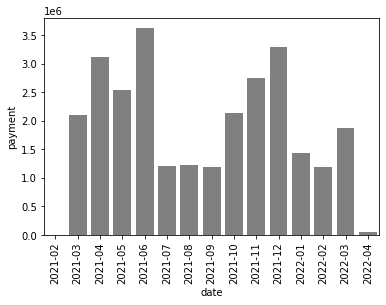

In [12]:
# 집계 결과를 시각화하기
a = temp_var.groupby(["date"])[['결제금액']].sum()
sns.barplot(data = a, x = a.index, y = "결제금액", color = "gray")
plt.xticks(rotation=90)
plt.ylabel("payment")

plt.show()

__필수 문제2 : 가장 인기 있는 음식/음료(sales_data를 이용합니다)__   
여러 메뉴들(음식, 음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화 해봅니다.

In [13]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# temp_var[temp_var["판매수량"] != -1]
# temp_var[temp_var["판매수량"] != -1].groupby(["상품명"])[["판매수량"]].sum()
temp_var.groupby(["상품명"])[["판매수량"]].sum()  # 취소된 것들을 고려하려면 오히려 뺴지 말고 구해야하는것 아닌가?

,판매수량
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,20


In [14]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
temp_var_group = temp_var.groupby(["상품명"])[["판매수량"]].sum()
temp_var_group.sort_values(by = "판매수량", ascending = False, inplace = True)
group_top10 = temp_var_group[:10]
group_top10

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


In [15]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# plt.rc("font", family = "Malgun Gothic")
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
plt.rc('font', family='NanumGothic') # For Windows

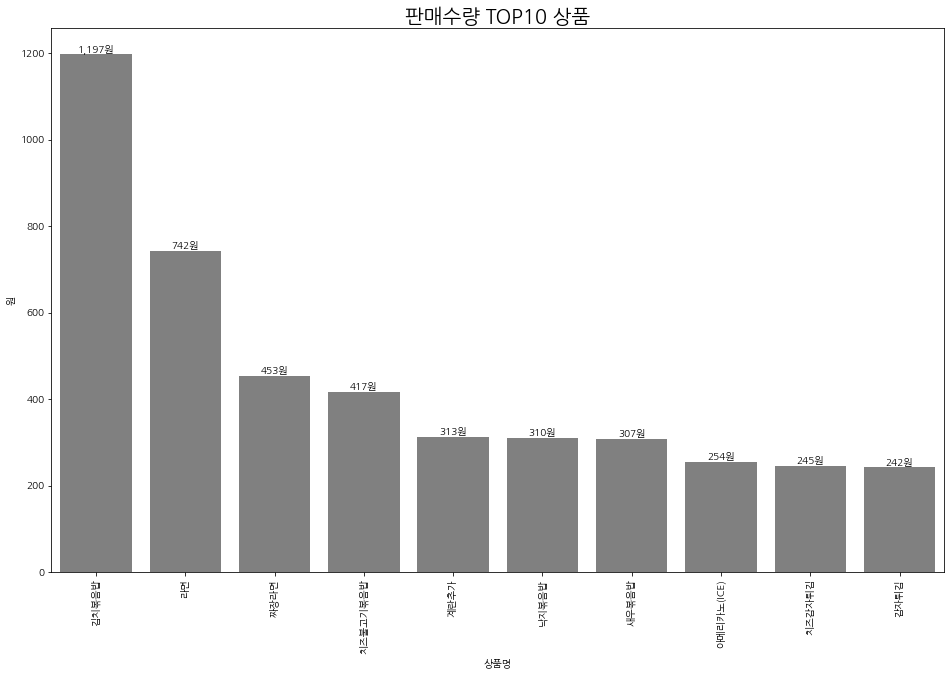

In [16]:
# 집계 결과를 시각화하기
plt.figure(figsize = (16,10))
p = sns.barplot(data = group_top10, x = group_top10.index, y = "판매수량", color = "gray")
p.bar_label(p.containers[0], labels=[f'{x:,.0f}원' for x in p.containers[0].datavalues])
plt.title("판매수량 TOP10 상품", fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel("원")
plt.show()

여러 메뉴들(음식, 음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅시다.    
힌트: value_counts() 함수를 사용하세요.

In [17]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
temp_group = temp_var.groupby(["상품명"])[["판매수량", "결제금액"]].sum()
temp_group

,판매수량,결제금액
상품명,,
(면)계란추가-국물라면,10,5000
(면)계란후라이 추가-불닭/짜장,20,20000
(면)치즈추가,21,10500
(밥)계란후라이 추가,3,3000
(밥)슈레드치즈추가,3,4500
...,...,...
한돈간장불고기덮밥,15,112500
한돈고추장불고기덮밥,17,127500
허니밀크쉐이크,20,108500


In [18]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
temp_group.sort_values(by = "결제금액", ascending = False, inplace = True)
temp_group_top10 = temp_group[:10]
temp_group_top10

,판매수량,결제금액
상품명,,
김치볶음밥,1197,5971900
라면,742,2916000
치즈불고기볶음밥,417,2276100
짜장라면,453,2032500
낙지볶음밥,310,1699700
새우볶음밥,307,1529800
치즈감자튀김,245,1348700
감자튀김,242,1083800
아메리카노(ICE),254,936100


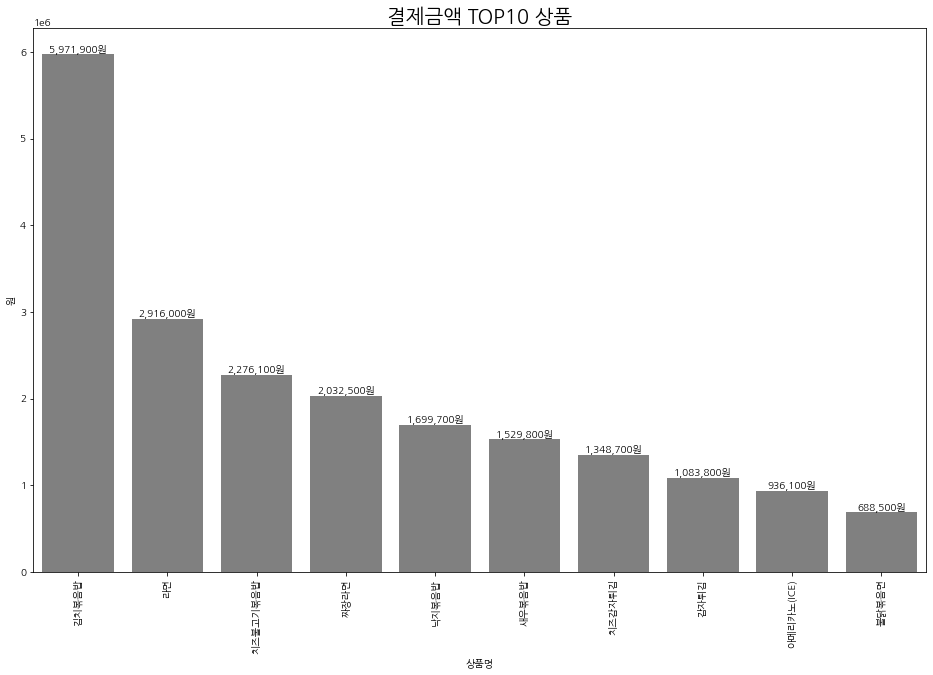

In [19]:
# 집계 결과 시각화하기
plt.figure(figsize = (16,10))
p = sns.barplot(data = temp_group_top10, x = temp_group_top10.index, y = "결제금액", color = "gray")
p.bar_label(p.containers[0], labels=[f'{x:,.0f}원' for x in p.containers[0].datavalues])
plt.title("결제금액 TOP10 상품", fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel("원")
plt.show()

- 필수 문제3 : 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)  
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.  

In [20]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data.copy()
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [21]:
temp_var.groupby(["요금제명"])[["금액"]].sum().sort_values(by = "금액", ascending = False)[:10]

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


In [22]:
top10_planname = temp_var.groupby(["요금제명"])[["금액"]].sum().sort_values(by = "금액", ascending = False)[:10]
top10_planname

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


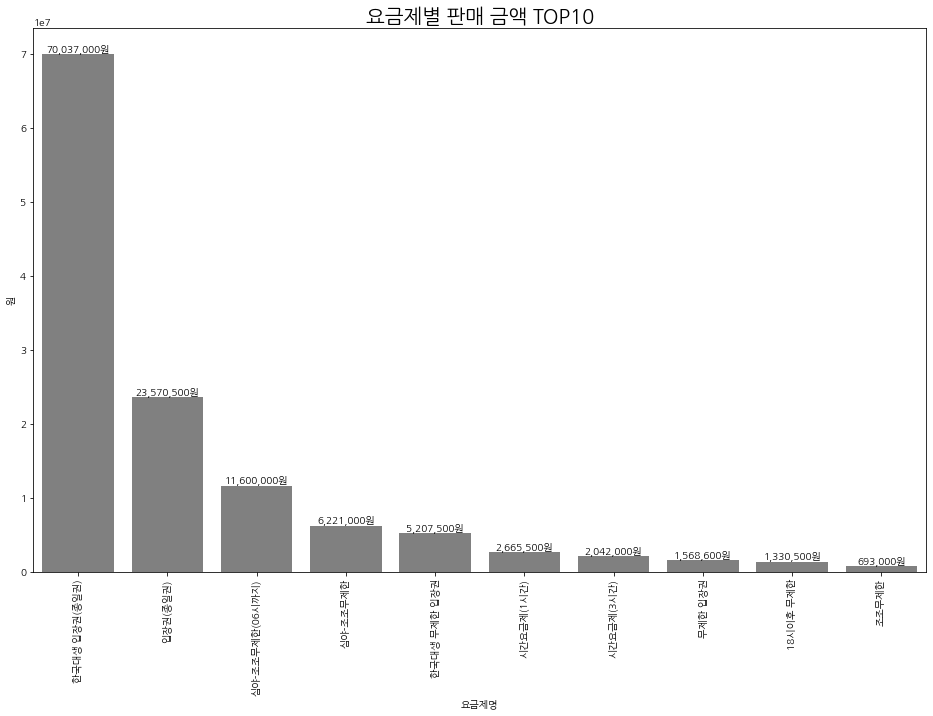

In [23]:
# 집계 결과 시각화하기
plt.figure(figsize = (16,10))
p = sns.barplot(data = top10_planname, x = top10_planname.index, y = "금액", color = "gray")
p.bar_label(p.containers[0], labels=[f'{x:,.0f}원' for x in p.containers[0].datavalues])
plt.title("요금제별 판매 금액 TOP10", fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel("원")
plt.show()

## 2. 전략 수립 및 실행

### 1) 전략 수립 및 실행
    주어진 필수 3문제는 아래와 같이 정리할 수 있다. 
        - 월명 매출액 추세 : 2021년 6월이 가장 높은 매출액을, 2021년 9월이 가장 낮은 매출액을 보임.
        - 가장 인기있는 음식/음료 : 김치볶음밥, 그리고 라면이 가장 많이 팔림.
        - 가장 많이 팔링 입장권 종류 : 한국대생(종일권)이 가장 많이 팔림. 두 번째는 일반 입장권(종일권)
   
> 아무래도 대학 앞에 있는 스터디 카페다보니 매출현황이 대학 학기 패턴을 따라가고 있는것으로 보임  
물론 코로나에 따른 영업제한 조치 또한 무시할 수 없음  

### 2) 나만의 분석 해보기
1. 고객별 결제금액


### 1. 고객별 결제금액

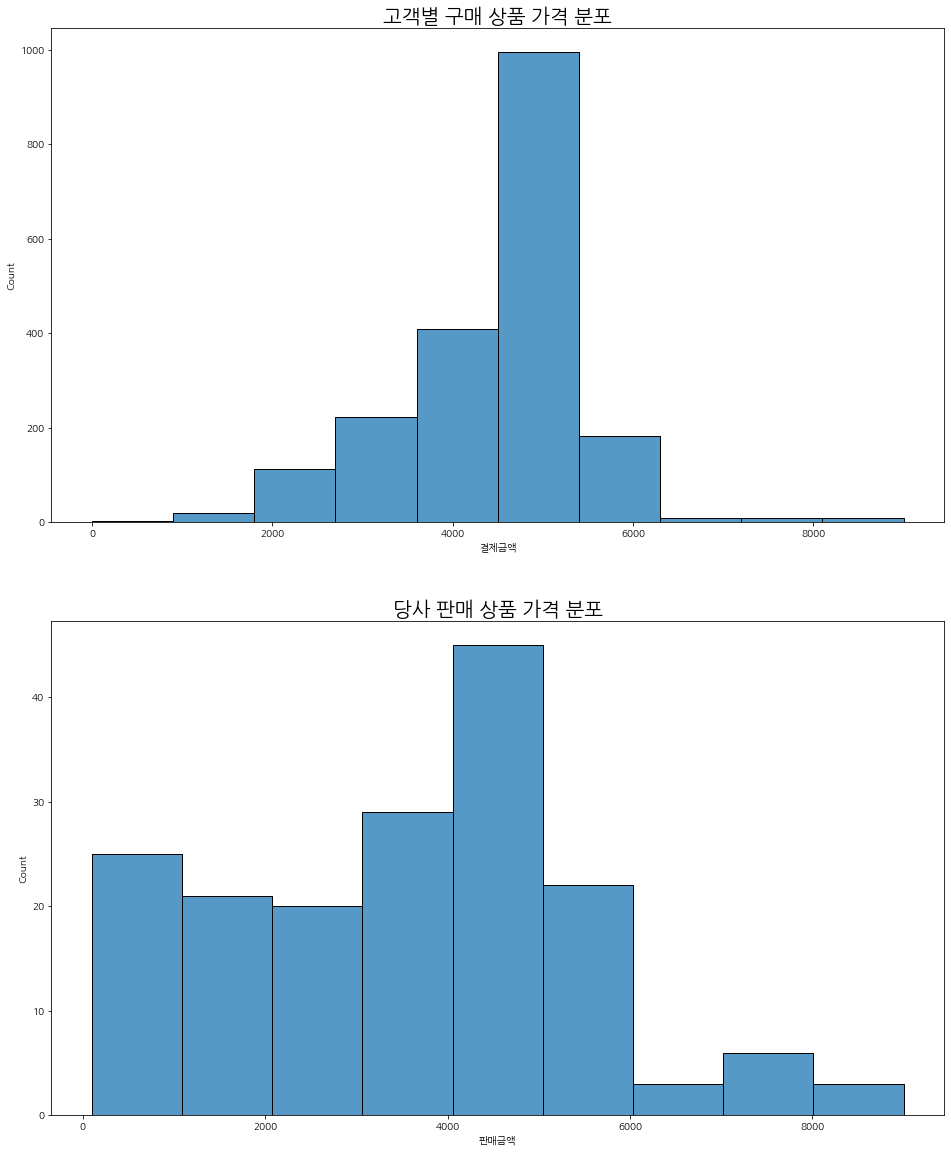

In [77]:
# 고객별 상품 구매 금액 분포
a= sales_data.groupby(["고객"])[["결제금액"]].mean()
plt.figure(figsize = (16,20))
plt.subplot(2,1,1)
plt.title("고객별 구매 상품 가격 분포", fontsize = 20)
sns.histplot(data=a, x = "결제금액", bins=10)

# 모두카페 상품 가격 분포
temp_item = item_data.copy()
temp_item["판매금액"] = temp_item["판매금액"].str[:-1]
temp_item["판매금액"] = temp_item["판매금액"].str.replace(",","").astype(int)

plt.subplot(2,1,2)
plt.title("당사 판매 상품 가격 분포", fontsize = 20)
sns.histplot(data=temp_item, x = "판매금액")

plt.show()

> 너무 저렴한 상품들보다 5000원 정도의 상품들이 주로 팔리고 있음 저가 상품들 수를 줄이고 5000원 정도의 상품들을 보다 많이 진열할 필요가 있을것으로 보임

### 2. 비수기 고객 분석

In [80]:
# 분석데이터 복사
temp_sales = sales_data.copy()

In [88]:
temp_sales.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507


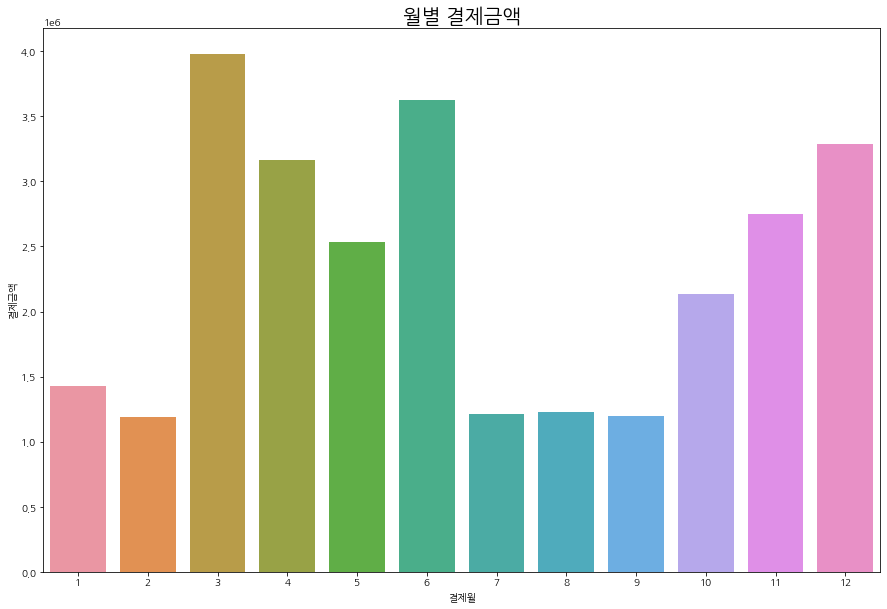

In [117]:
# 분석데이터 복사
temp_sales = sales_data.copy()

# 결제 시점별 분리
temp_sales["결제월"] = temp_sales["결제일시"].str[5:7].astype(int)
temp_sales["결제일"] = temp_sales["결제일시"].str[8:10].astype(int)
temp_sales["결제시"] = temp_sales["결제일시"].str[11:13].astype(int)

plt.figure(figsize = (15, 10))

# 월별 
plt.title("월별 결제금액", fontsize = 20)
a = temp_sales.groupby(["결제월"])[["결제금액"]].sum()
sns.barplot(data = a, x = a.index, y = "결제금액")
plt.show()

__가설__
> 시험기간인 4월보다 3월의 판매량이 더 높은 이유는 신입생이 많아서 그럴것이다. 때문에 이용시간에 비해 결제금액이 높을 것으로 추정된다.

In [152]:
temp_entry = entry_data.copy()
temp_entry["입실"] = pd.to_datetime(temp_entry["입실"])
temp_entry["퇴실"] = pd.to_datetime(temp_entry["퇴실"])
temp_entry["이용시간"] = temp_entry["퇴실"] - temp_entry["입실"]
temp_entry["이용시간"] = temp_entry["이용시간"].astype(str)
temp_entry["이용시간"] = temp_entry["이용시간"].str[7:-3]
temp_entry["이용시"] = pd.to_datetime(temp_entry["이용시간"]).dt.hour
temp_entry["이용분"] = pd.to_datetime(temp_entry["이용시간"]).dt.minute
temp_entry["이용시간"] = temp_entry["이용시"]*60 + temp_entry["이용분"]
temp_entry["이용월"] = temp_entry["입실"].dt.month
temp_entry["이용일"] = temp_entry["입실"].dt.day
temp_entry["이용시간"]

0         60
1         60
2         46
3         46
4        154
        ... 
22550     70
22551     70
22552     73
22553     73
22554     81
Name: 이용시간, Length: 22555, dtype: int64

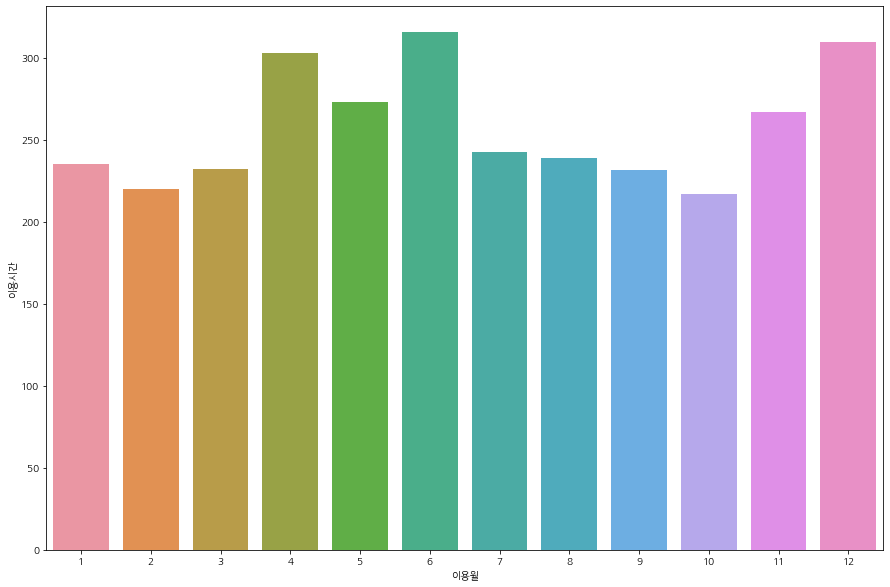

In [158]:
plt.figure(figsize = (15,10))
a = temp_entry.groupby(["이용월"])[["이용시간"]].mean()
plt.title("월별 고객 평균 이용시간 ")
sns.barplot(data = a, x = a.index, y = "이용시간")
plt.show()

> 확실히 3월에는 매출액에 비해서 이용시간이 짧은것을 확인할 수 있음. 아마도 신학기가 되어 학생들이 공부에 대한 의욕이 불타 많이 들어오고 시험기간이 아니라서 주문을 많이 해서 주로 먹고 놀다가 가는것으로 보임. 오히려 이용시간 자체는 4월이 더 긴것으로 확인됨. 그러므로 4월은 회전율은 떨어지고 주문은 적게하는 모습

1. 3월에 고객

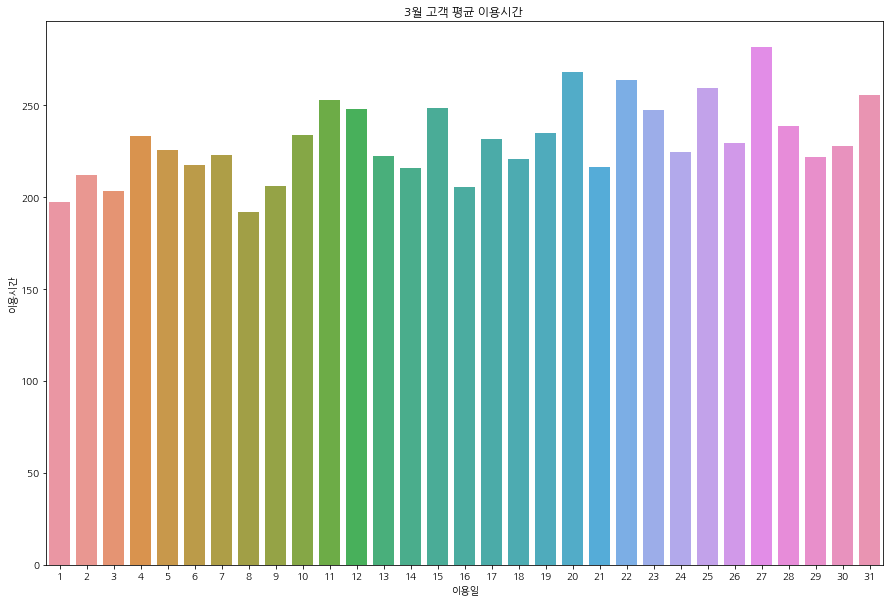

In [159]:
# 3월의 고객 이용시간
plt.figure(figsize = (15,10))
a = temp_entry[temp_entry["이용월"] == 3].groupby(["이용일"])[["이용시간"]].mean()
plt.title("3월 고객 평균 이용시간 ")
sns.barplot(data = a, x = a.index, y = "이용시간")
plt.show()

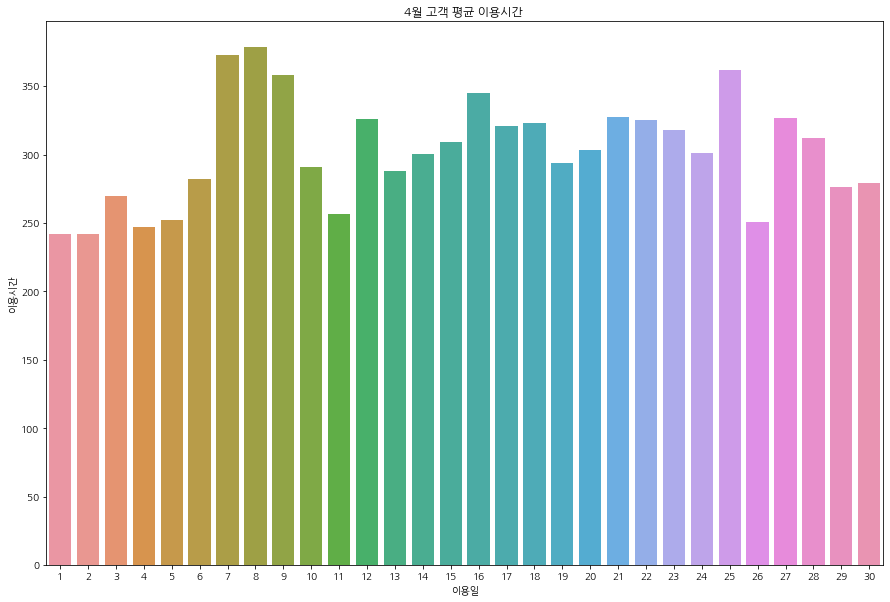

In [160]:
# 4월의 고객 이용시간
plt.figure(figsize = (15,10))
a = temp_entry[temp_entry["이용월"] == 4].groupby(["이용일"])[["이용시간"]].mean()
plt.title("4월 고객 평균 이용시간 ")
sns.barplot(data = a, x = a.index, y = "이용시간")
plt.show()

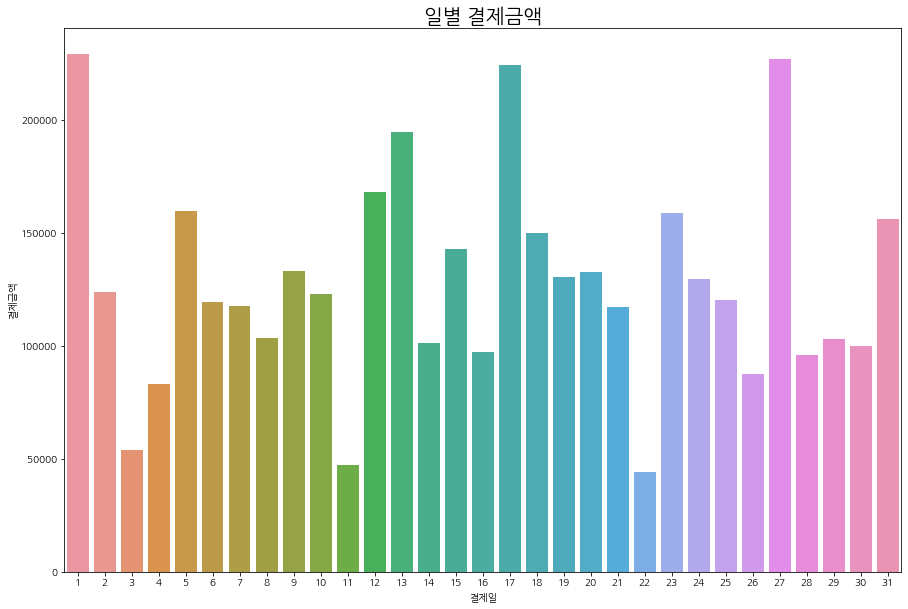

In [163]:
plt.figure(figsize = (15,10))
plt.title("일별 결제금액", fontsize = 20)
a = temp_sales[temp_sales["결제월"] == 3].groupby(["결제일"])[["결제금액"]].sum()
sns.barplot(data = a, x = a.index, y = "결제금액")
plt.show()

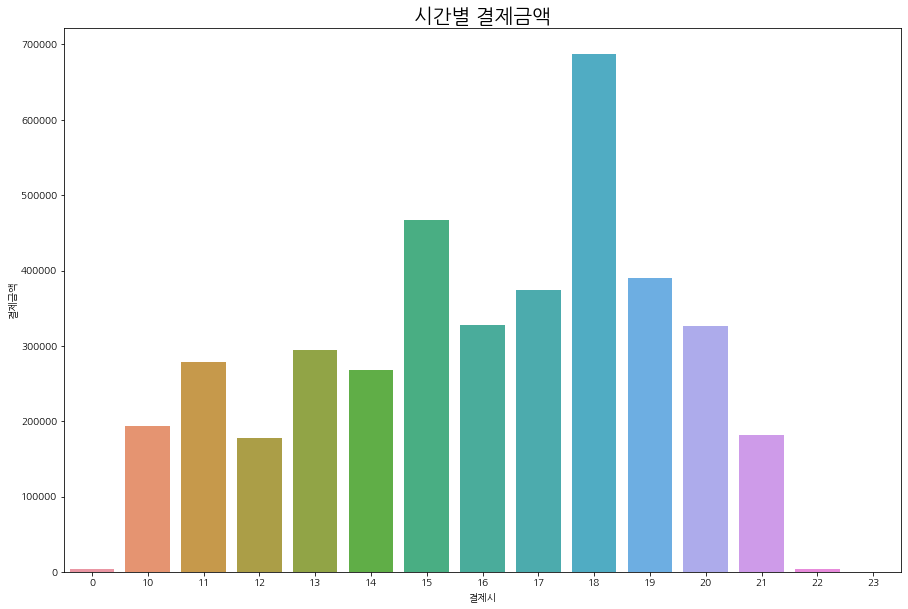

In [164]:
plt.figure(figsize = (15, 10))
plt.title("시간별 결제금액", fontsize = 20)
a = temp_sales[temp_sales["결제월"] == 3].groupby(["결제시"])[["결제금액"]].sum()
sns.barplot(data = a, x = a.index, y = "결제금액")

plt.show()

> 오전시간보다 저녁시간에 주로 상품 판매가 몰려있다. 아마 식사 류가 많이 판매 된것으로 생각되는데 실제로 어떤 제품이 판매되었는지 확인해보자